## Part 7

In [1]:
import optilibrary as ot
import numpy as np
np.random.seed(1)
import matplotlib.pyplot as plt

X_train, y_train, X_test, y_test, cols = ot.importData(p=0.2)


### Question 1
_For the objective of Question 2, Part 1, implement Heavy Ball. Try several momentum parameters and stepsizes, and find the best ones._


Using the data from Part 1, we implement heavy ball. 
Recall that the objective function $F$ writes as 
\begin{equation*}
F:\theta \to \frac{1}{2n}||X\theta-y||_2^2,
\end{equation*}
with gradient equal to 
\begin{equation*}
\nabla F: \to \frac{1}{n} X^{T} (X\theta-y),
\end{equation*}
where $X\in\mathbb{R}^{n\times d}$, $\theta\in\mathbb{R}^{d}$ and $y \in \mathbb{R}^{n}$

An initial run of 70 iterations with a step size $\alpha=0.75$ and momentum parameter $\gamma=0.9$ yields the following:

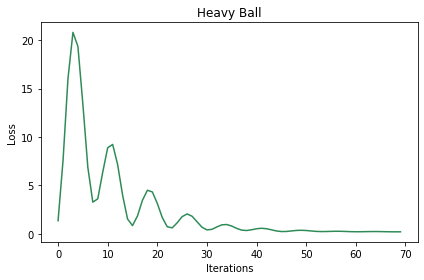

In [2]:
plt.figure(figsize=(6,4), tight_layout=True)
max_iter = 70
theta = np.zeros(X_train.shape[1])
g = 0.9
s =  0.75

i, l = ot.heavy_ball(X_train, y_train, max_iter, step=s, gamma=g)
plt.plot(l, color='seagreen')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title(f'Heavy Ball');

We observe the heavy ball method converging after an initial oscillating phase which corresponds well to the intuition of a ball rolling around the curvature of a bowl before finding the bottom.

#### Momentum

We fix the step size at $\alpha=0.014$ and for varying values of the momentum parameter $\gamma$ perform the same procedure:

In [3]:
max_iter = 500
theta = np.zeros(X_train.shape[1])
GAM = [0, 0.25, 0.5, 0.75, 0.99, 1]
s =  0.014

thstars = []
errs = []
for g in GAM:
    i, l = ot.heavy_ball(X_train, y_train, max_iter, step=s, gamma=g)
    thstars.append(i)
    errs.append(l)

thstars = np.array(thstars)
errs = np.array(errs)

# print(thstars.shape, errs.shape)

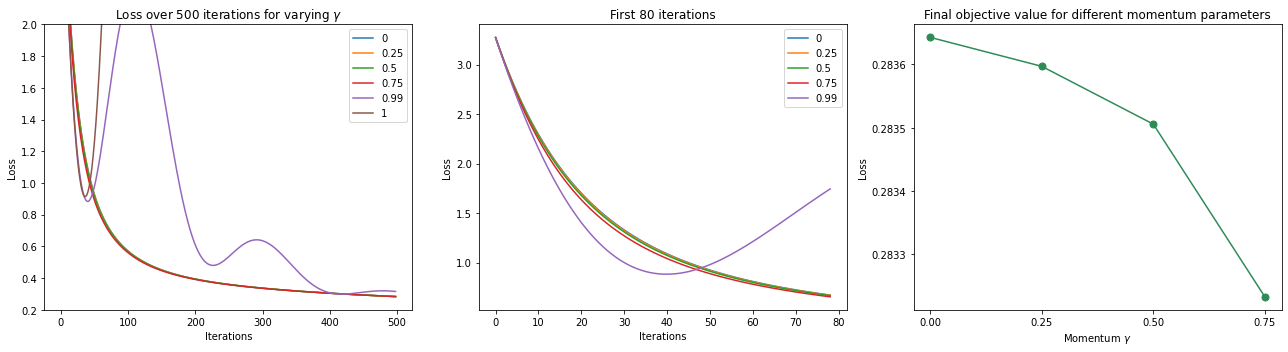

In [4]:
plt.figure(figsize=(18,5), tight_layout=True)
plt.subplot(1,3,1)
plt.plot(errs.T[1:], label=GAM) #, label=GAM)
plt.legend()
plt.ylim(0.2, 2)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title(f'Loss over {max_iter} iterations for varying $\gamma$');

plt.subplot(1,3,2)
plt.plot(errs.T[1:80,:-1], label=GAM[:-1]) #, label=GAM)
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title(f'First 80 iterations');


plt.subplot(1,3, 3)
plt.title('Final objective value for different momentum parameters')
plt.xlabel(r'Momentum $\gamma$')
plt.ylabel('Loss')
plt.plot(GAM[:-2], (errs[:-2, -1]), '.-', markersize=14, c='seagreen')
plt.xticks(GAM[:-2]);

A momentum-parameter of 1 causes heavy-ball to diverge almost immediately and a parameter of 0.99 has the method oscillating before settling down. At first glance, the other parameters for momentum seem to have nearly exactly the same effect as no momentum at all in the convergence of the methods. We consider the other parameters and plot the final objective value over a very small run of 30 iterations since the method seems to converge so quickly.

As the method seems to converge quickly, we now run 100 iterationss each for 50 different values of $\gamma$ and consider the final loss for each.

In [5]:
max_iter = 100
theta = np.zeros(X_train.shape[1])
GAM = np.linspace(0.5, 0.99, 50)
s = 0.014

iterates = []
vals = []
trainloss = []
for g in GAM:
    i, l = ot.heavy_ball(X_train, y_train, max_iter, step=s, gamma=g)
    vals.append(l)
    trainloss.append(l[-1])

trainloss = np.array(trainloss)
vals = np.array(vals)

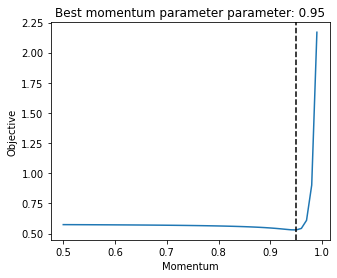

In [6]:
trainloss = np.array(trainloss)
min_i = trainloss.argmin()
np.min(trainloss)
plt.figure(figsize=(5,4))
plt.plot(GAM, trainloss)
# plt.ylim(0.45, 0.48)
plt.axvline(x=GAM[min_i], linestyle='dashed', c='k')
plt.title(f'Best momentum parameter parameter: {np.round(GAM[min_i], 4)}')
plt.xlabel('Momentum')
plt.ylabel('Objective');

The optimal parameter for $\gamma$ seems to be at 0.95. Indeed, the graph below shows the evolution of the error for a number of values, and we see that this momentum parameter moves the least. 

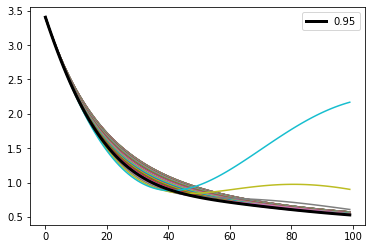

In [7]:
plt.plot(vals.T);
plt.plot(vals.T[:,min_i], 'k', linewidth=3, label='0.95');
plt.legend();
# plt.ylim(0, 3)

In [8]:
bestgamma = GAM[min_i]

#### Step Size
Fix now the momentum parameter $\gamma = 0.95$, and for varying step sizes 
$$\alpha \in \{0.001, 0.01, 0.1, 1\},$$
we obtain the following:

In [9]:
max_iter = 200
theta = np.zeros(X_train.shape[1])
STEP = [0.0001, 0.001, 0.01, 0.1, 1]
gamma = bestgamma

thstars = []
errs = []
for s in STEP:
    i, l = ot.heavy_ball(X_train, y_train, max_iter, s, gamma)
    thstars.append(i)
    errs.append(l)

thstars = np.array(thstars)
errs = np.array(errs)

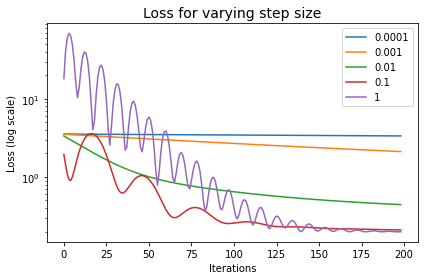

In [10]:
plt.figure(figsize=(6,4), tight_layout=True)
# plt.subplot(3,1,1)
plt.plot(errs.T[1:], label=STEP)
plt.legend()
plt.yscale('log')
plt.ylabel('Loss (log scale)')
plt.xlabel('Iterations')
plt.title(f'Loss for varying step size', fontsize=14);


The above simulation seems to suggest that a step size of $\alpha=0.1$ will provide the quickest convergence results. Step sizes that are too small seem to inhibit fast convergence.

To investigate this in greater detail, we run a simulation for 100 different values of the step parameter on the interval $[0.1, 1.1]$, and find the value that obtains the least loss for the training set. 

In [11]:
max_iter = 300
theta = np.zeros(X_train.shape[1])
STEP = np.linspace(0.1, 1.1, 100) # momentum parameter

vals = []
trainloss = []
for s in STEP:
    # i, l = heavy_ball(F, gradf, theta, max_iter, mu, L, gamma=gamma, step=s)
    i, l = ot.heavy_ball(X_train, y_train, max_iter, s, gamma)
    trainloss.append(l[-1])
    vals.append(l)

In [12]:
vals = np.array(vals)
trainloss = np.array(trainloss)
min_i = trainloss.argmin()

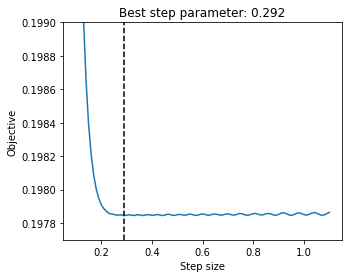

In [13]:
plt.figure(figsize=(5,4))
plt.plot(STEP, trainloss)
plt.ylim(0.1977, 0.199)
plt.axvline(x=STEP[min_i], linestyle='dashed', c='k');
plt.title(f'Best step parameter: {np.round(STEP[min_i], 3)}')
plt.xlabel('Step size')
plt.ylabel('Objective');

In [14]:
beststep = STEP[min_i]

The optimal step size, rounded to 3 significant digits, is 0.292. Indeed, we see for the final 200 iterations that the loss is still oscillating quite a bit, but that this step value is dying out fastest.

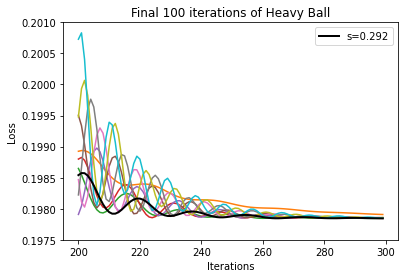

In [15]:
plt.plot(np.arange(200, 300), vals.T[200:, ::10])
plt.plot(np.arange(200, 300), vals.T[200:, min_i], c='k', linewidth=2, label='s=0.292')
plt.legend()
plt.ylim(0.1975, 0.201);
plt.title('Final 100 iterations of Heavy Ball')
plt.xlabel('Iterations')
plt.ylabel('Loss');

In [16]:
beststep = STEP[min_i]

### Question 2
_With these parameters, how does Heavy Ball compare with gradient descent?_ 

Recall that the best parameters are:

In [17]:
print(f'Step: {np.round(beststep, 3)} \nGamma: {bestgamma}')

Step: 0.292 
Gamma: 0.95


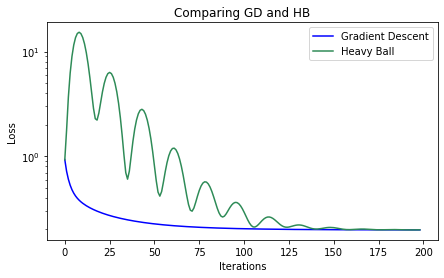

In [18]:
max_iter = 200
theta = np.zeros(X_train.shape[1])

#Gradient Descent
iGD, lGD = ot.GD_ridge(X_train, y_train, max_iter, beststep, lmbd=0)
#Heavy Ball
iHB, lHB = ot.heavy_ball(X_train, y_train, max_iter, beststep, bestgamma)

plt.figure(figsize=(7,4))
plt.yscale("log")
plt.plot(lGD[1:], label='Gradient Descent', c='b')
plt.plot(lHB[1:], label='Heavy Ball', c='seagreen')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title(f'Comparing GD and HB');
plt.legend();
 

For the parameters tuned for heavy ball, we see heavy ball oscillating somewhat in the beginning but then settling out and converging after about 100 iterations. GD, on the other hand, converges much quicker but then stagnates after about 100 iterations.

### Question 3: Non-convex optimisation

_Propose a non-convex loss function for your regression or classification problem. Try minimizing the loss with gradient descent, and check that you reach at least an approximate first-order approximate critical point. Do you get good prediction results?_

In [19]:
from scipy.linalg import norm

Consider now the objective function:
\begin{equation*}
F:\theta \to \frac{1}{2n}||X\theta-y||_2^2 + \lambda||\theta||_{p}, 
\end{equation*}

where $\theta \in \mathbb{R}^{n\times d}$ and $p \in (0,1)$. The gradient writes as 
\begin{equation*}
\nabla F: \to \frac{1}{n} X^{T} (X\theta-y) + \lambda\nabla||\theta||_{p}
\end{equation*}

for 
$$ \nabla{||\theta||_p} = {||\theta||_{p}}^{1-p} \cdot [\theta_1^{p-1}, \theta_2^{p-1}, \dots, \theta_n^{p-1}]^T

We run 500 iterations of gradient descent with this non-convex regularisation term for the following parameters
- p=0.25
- $\alpha=0.015$ (which is optimal for the original problem as determined in Part 1)
- $\lambda =10^{-5}$ 

In [20]:
thstar, loss, grads = ot.GD_nonconxev(X_train, y_train, p=0.25, niter=500, step=0.015, lmbd=1e-5)

print('Running GD with a non-convex regulariser:\n')
print(f'Final gradient coefficients: \n{grads[-1]} \n Final gradient norm: {norm(grads[-1], 2, axis=0)}')

Running GD with a non-convex regulariser:

Final gradient coefficients: 
[-0.00160573  0.00125058  0.01821395  0.01853524 -0.0211332   0.00919759
  0.07988003  0.07211536  0.06984595] 
 Final gradient norm: 0.13293064018677092


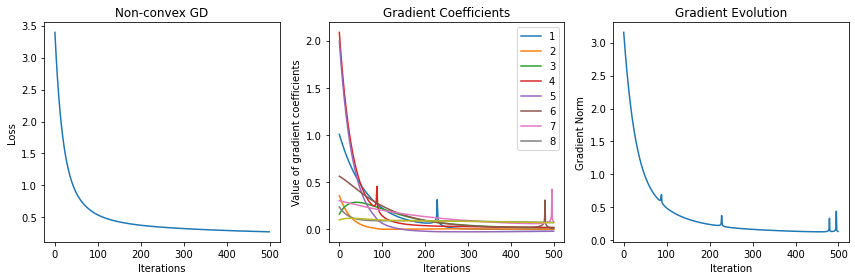

In [21]:
plt.figure(figsize=(12,4), tight_layout=True)
plt.subplot(1,3,1)
plt.plot(loss)
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.title('Non-convex GD')

plt.subplot(1,3,2)
plt.plot(grads)
plt.legend(np.arange(1, 9))
plt.title('Gradient Coefficients')
plt.xlabel('Iterations')
plt.ylabel('Value of gradient coefficients')

plt.subplot(1,3,3)
plt.plot(norm(grads, 2, axis=1))
plt.title('Gradient Evolution')
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm');

We have at least an approximate first-order critical point as the gradient at the last iteration has norm \~ 0.133.

Let us now check our ability to predict on the test set.

Recall that the model is specified by the very simple equation $$y = X\theta^*$$ and we have recovered $\hat\theta$ after running GD with a non-convex regulariser. We consider from the training set following: $\hat{y} = X_{train}\hat\theta$ and the true observed labels $y^*$ to plot the differences in predictions and relative error.

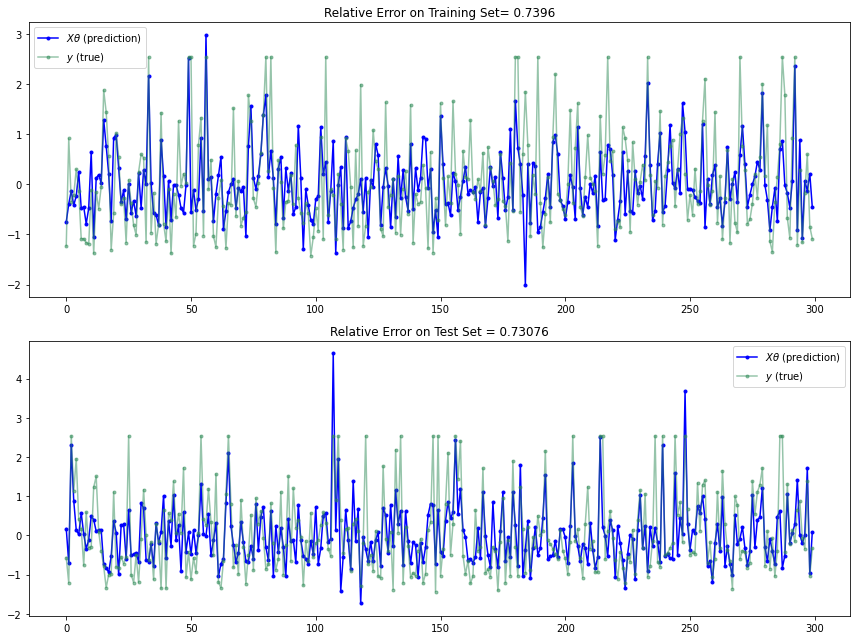

In [22]:
numpredictions=300

plt.clf
plt.figure(figsize= (12,9), tight_layout=True)
plt.subplot(2, 1, 1)
plt.plot( X_train.dot(thstar)[0:numpredictions], 'b.-')
plt.plot( y_train[0:numpredictions], '.-', c='seagreen', alpha=0.5)
rel_err = np.linalg.norm(X_train.dot(thstar) - y_train, 2) / np.linalg.norm(y_train, 2)
plt.title(f'Relative Error on Training Set= {np.round(rel_err, 4)}')
plt.legend((r'$X\theta$ (prediction)', r'$y$ (true)'))

plt.subplot(2, 1, 2)
plt.plot( X_test.dot(thstar)[0:numpredictions], 'b.-')
plt.plot( y_test[0:numpredictions], '.-', c='seagreen', alpha=0.5)
rel_err = np.linalg.norm(X_test.dot(thstar) - y_test, 2) / np.linalg.norm(y_test, 2)
plt.title(f'Relative Error on Test Set = {np.round(rel_err, 5)}')
plt.legend((r'$X\theta$ (prediction)', r'$y$ (true)'));

The relative error on both the test and train set are comparable up to 2 significant digits and although not very close to 0, seems reasonable. 

Consider also a histogram and kernel density plot of the observed and predicted lables $y^*$ and $\hat{y}$ below:

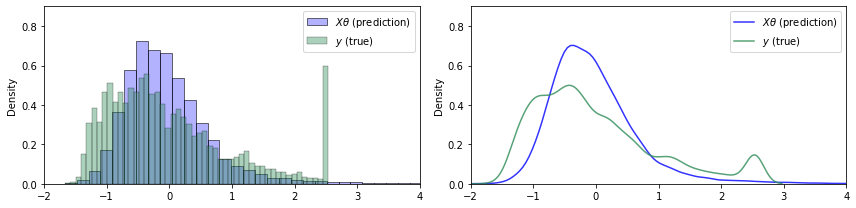

In [23]:
import seaborn as sns
plt.figure(figsize= (12,3), tight_layout=True)
plt.subplot(1,2,1)
sns.histplot(x=X_train.dot(thstar), kde=False, stat='density', bins=50, color='b', alpha=0.3)
sns.histplot(x=y_train, kde=False, stat='density', bins=50, color='seagreen', alpha=0.4);
plt.xlim(-2, 4)
plt.ylim(0, 0.9)
plt.legend((r'$X\theta$ (prediction)', r'$y$ (true)'));

plt.subplot(1,2,2)
sns.kdeplot(x=X_train.dot(thstar), color='b', alpha=0.8)
sns.kdeplot(x=y_train, color='seagreen', alpha=0.8)
plt.xlim(-2, 4)
plt.ylim(0, 0.9)
plt.legend((r'$X\theta$ (prediction)', r'$y$ (true)'));

We observe that these follow roughly the same distribution, indicating that long-term predictions would be statistically consistent.